In [1]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# Matplotlib is used for data visualization
import matplotlib.pyplot as plt


In [3]:
# Load the CSV dataset into a DataFrame
df = pd.read_csv("customer_support_tickets.csv")

# Preview the first 5 rows
df.head()


,ticket_subject,ticket_description,resolution,ticket_type,support_queue,priority_level,category
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte ein...",Vielen Dank fÃ¼r die Meldung des kritischen Si...,Incident,Technical Support,high,Security
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,Account
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,Product
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,Billing
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,Product


In [5]:
# Display dataset structure, columns, and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ticket_subject      24749 non-null  object
 1   ticket_description  28587 non-null  object
 2   resolution          28580 non-null  object
 3   ticket_type         28587 non-null  object
 4   support_queue       28587 non-null  object
 5   priority_level      28587 non-null  object
 6   category            28587 non-null  object
dtypes: object(7)
memory usage: 1.5+ MB


In [7]:
# Count missing values in each column
df.isnull().sum()


ticket_subject        3838
ticket_description       0
resolution               7
ticket_type              0
support_queue            0
priority_level           0
category                 0
dtype: int64

In [9]:
# Calculate percentage of missing values
(df.isnull().sum() / len(df)) * 100


ticket_subject        13.425683
ticket_description     0.000000
resolution             0.024487
ticket_type            0.000000
support_queue          0.000000
priority_level         0.000000
category               0.000000
dtype: float64

In [11]:
# Count tickets by priority level
priority_dist = df["priority_level"].value_counts()
priority_dist


priority_level
medium    11515
high      11178
low        5894
Name: count, dtype: int64

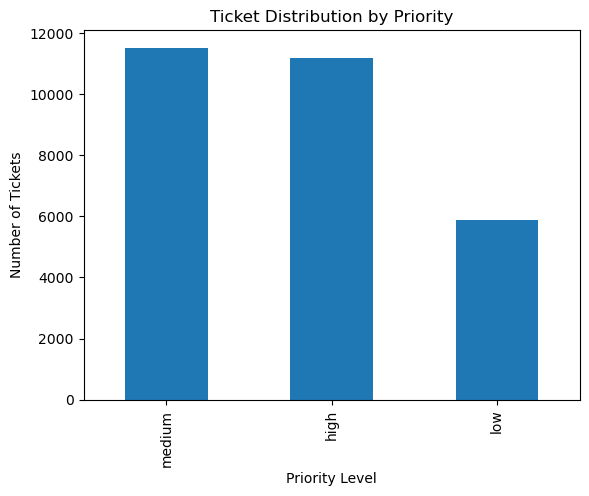

In [13]:
#Visualization – Tickets by Priority
priority_dist.plot(kind="bar")
plt.title("Ticket Distribution by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()

In [15]:
# Count tickets by type
type_dist = df["ticket_type"].value_counts()
type_dist


ticket_type
Incident    11466
Request      8187
Problem      6012
Change       2922
Name: count, dtype: int64

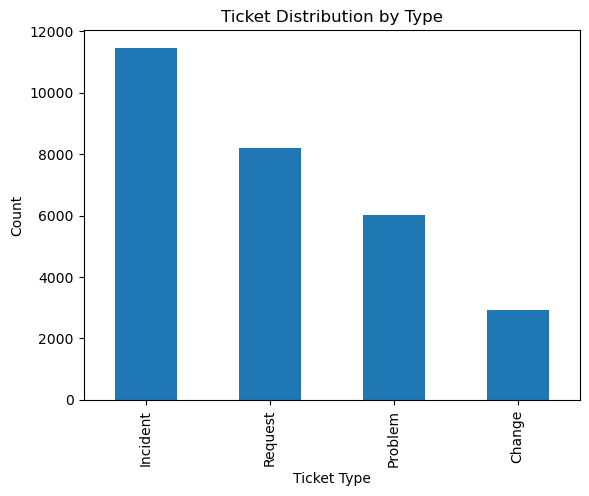

In [17]:
#Visualization – Tickets by Type
type_dist.plot(kind="bar")
plt.title("Ticket Distribution by Type")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.show()

In [19]:
# Count tickets by category
category_dist = df["category"].value_counts()
category_dist.head(10)


category
Security         5880
Bug              5337
Feedback         3557
Feature          3081
Performance      3065
Billing          1382
Outage           1199
Network          1063
Product           611
Documentation     586
Name: count, dtype: int64

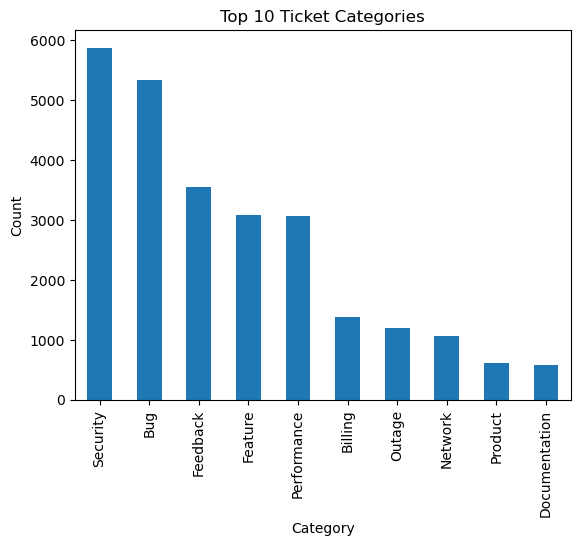

In [21]:
#Visualization – Top 10 Categories
category_dist.head(10).plot(kind="bar")
plt.title("Top 10 Ticket Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [23]:
# Import pandas for data handling
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for visualization
import matplotlib.pyplot as plt


In [25]:
# Load dataset
df = pd.read_csv("customer_support_tickets.csv")

# Preview data
df.head()


,ticket_subject,ticket_description,resolution,ticket_type,support_queue,priority_level,category
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte ein...",Vielen Dank fÃ¼r die Meldung des kritischen Si...,Incident,Technical Support,high,Security
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,Account
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,Product
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,Billing
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,Product


In [27]:
# List of important text columns
text_columns = [
    "ticket_subject",
    "ticket_description",
    "resolution",
    "category"
]

# Fill missing text values
df[text_columns] = df[text_columns].fillna("Not Provided")


In [29]:
# Remove spaces and standardize text
df["priority_level"] = df["priority_level"].str.strip().str.capitalize()

# Fill missing priority with default value
df["priority_level"] = df["priority_level"].fillna("Medium")


In [31]:
# Check missing values after cleaning
df.isnull().sum()


ticket_subject        0
ticket_description    0
resolution            0
ticket_type           0
support_queue         0
priority_level        0
category              0
dtype: int64

In [33]:
# Map priority levels to numeric scores
priority_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4
}

# Create priority score column
df["priority_score"] = df["priority_level"].map(priority_map)


In [35]:
# Simulate resolution duration (in hours)
np.random.seed(42)
df["resolution_duration"] = np.random.randint(1, 72, size=len(df))


In [37]:
df[["priority_level", "priority_score", "resolution_duration"]].head()


,priority_level,priority_score,resolution_duration
0,High,3,52
1,High,3,15
2,Medium,2,61
3,Low,1,21
4,Medium,2,24


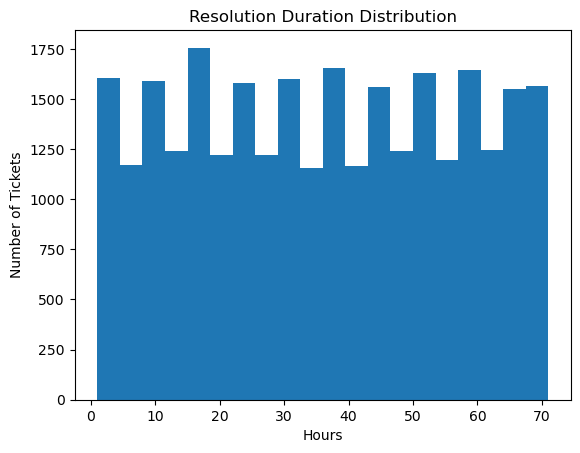

In [39]:
#Visualization – Resolution Duration Distribution
df["resolution_duration"].plot(kind="hist", bins=20)
plt.title("Resolution Duration Distribution")
plt.xlabel("Hours")
plt.ylabel("Number of Tickets")
plt.show()


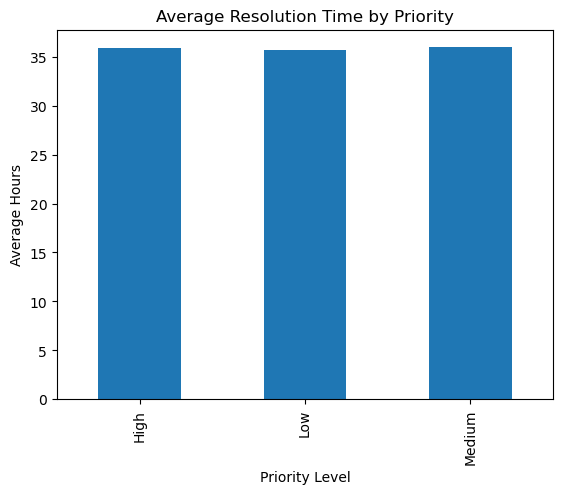

In [41]:
#Avg Resolution Time by Priority
df.groupby("priority_level")["resolution_duration"].mean().plot(kind="bar")
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Average Hours")
plt.show()

In [43]:
# Save cleaned dataset
df.to_csv("cleaned_support_tickets.csv", index=False)
